In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors_2d(vectors, labels, colors, title):
    """
    Plot multiple 2D vectors from origin
    """
    plt.figure(figsize=(10, 8))
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)
    plt.grid(True, alpha=0.3)
    
    for vec, label, color in zip(vectors, labels, colors):
        plt.arrow(0, 0, vec[0], vec[1], 
                 head_width=0.3, head_length=0.3, 
                 fc=color, ec=color, linewidth=2, 
                 length_includes_head=True, label=label)
        plt.text(vec[0]*1.1, vec[1]*1.1, label, fontsize=10, fontweight='bold')
    
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def solve_linear_combination_2d(a, b, c):
    """
    Solve if c = x*a + y*b
    Returns (x, y) if solution exists, None otherwise
    """
    A = np.array([[a[0], b[0]], [a[1], b[1]]])
    C = np.array([c[0], c[1]])
    
    try:
        solution = np.linalg.solve(A, C)
        result = solution[0] * a + solution[1] * b
        
        if np.allclose(result, c, atol=1e-10):
            return solution
        else:
            return None
    except np.linalg.LinAlgError:
        return None

def solve_linear_combination_3d(a, b, c):
    """
    Solve if c = x*a + y*b for 3D vectors
    Returns (x, y) if solution exists, None otherwise
    """
    A = np.column_stack([a, b])
    
    try:
        solution, residuals, rank, s = np.linalg.lstsq(A, c, rcond=None)
        result = solution[0] * a + solution[1] * b
        
        if np.allclose(result, c, atol=1e-10):
            return solution
        else:
            return None
    except:
        return None

print("✅ Libraries imported and helper functions defined!")

✅ Libraries imported and helper functions defined!


 hgg---
## 📝 Problem 1

**Given:** $\vec{a} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -3 \\ 4 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 7 \\ -6 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:
$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:
$$\begin{cases}
2x - 3y = 7 \quad \text{(Equation 1)} \\
-x + 4y = -6 \quad \text{(Equation 2)}
\end{cases}$$

**Solving by elimination:**

Multiply Equation 2 by 2:
$$-2x + 8y = -12 \quad \text{(Equation 3)}$$

Add Equation 1 and Equation 3:
$$2x - 3y + (-2x + 8y) = 7 + (-12)$$
$$5y = -5$$
$$y = -1$$

Substitute $y = -1$ into Equation 2:
$$-x + 4(-1) = -6$$
$$-x - 4 = -6$$
$$-x = -2$$
$$x = 2$$

**Verification:**

$$x\vec{a} + y\vec{b} = 2\begin{bmatrix} 2 \\ -1 \end{bmatrix} + (-1)\begin{bmatrix} -3 \\ 4 \end{bmatrix} = \begin{bmatrix} 4 \\ -2 \end{bmatrix} + \begin{bmatrix} 3 \\ -4 \end{bmatrix} = \begin{bmatrix} 7 \\ -6 \end{bmatrix} = \vec{c}$$

✓ Verified!

Problem 1: Is c a linear combination of a and b?
a = [ 2 -1]
b = [-3  4]
c = [ 7 -6]

✅ YES! c IS a linear combination of a and b

Solution: x = 2.0000, y = -1.0000

Verification:
2.0000 * a = 2.0000 * [ 2 -1] = [ 4. -2.]
-1.0000 * b = -1.0000 * [-3  4] = [ 3. -4.]

Result: 2.0000*a + -1.0000*b = [ 7. -6.]
Target: c = [ 7 -6]

✓ Match: True


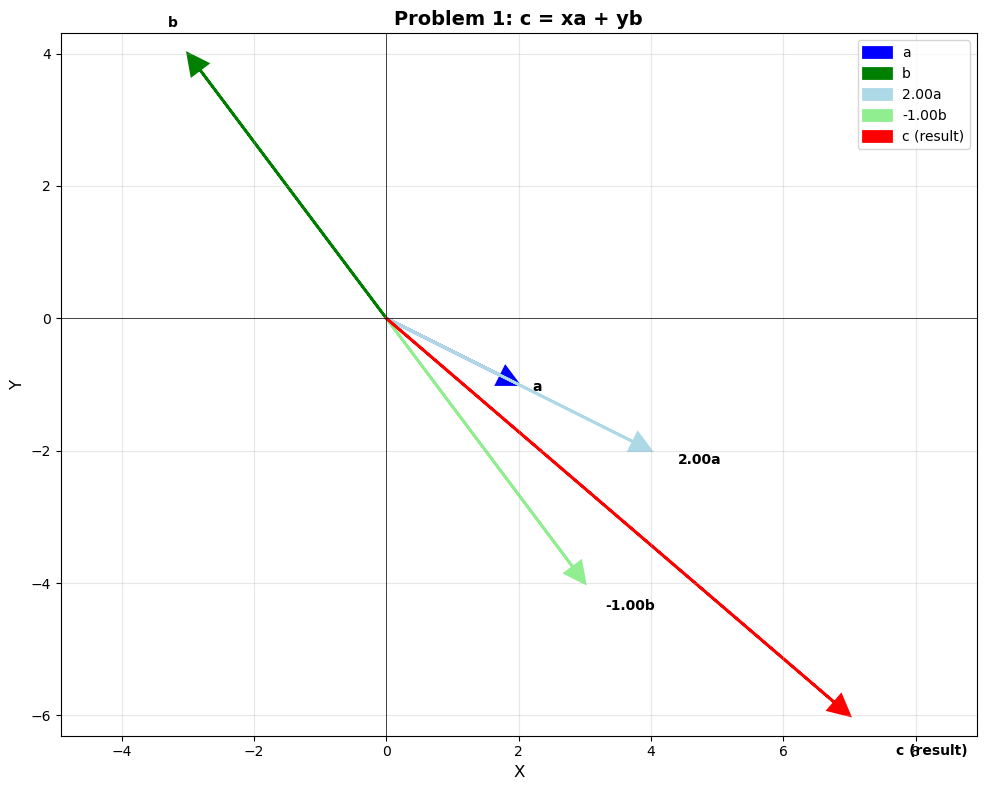

In [15]:
# Problem 1
a = np.array([2, -1])
b = np.array([-3, 4])
c = np.array([7, -6])

print("Problem 1: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    # Plot the vectors
    plot_vectors_2d(
        [a, b, x*a, y*b, c],
        ['a', 'b', f'{x:.2f}a', f'{y:.2f}b', 'c (result)'],
        ['blue', 'green', 'lightblue', 'lightgreen', 'red'],
        'Problem 1: c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

---
## 📝 Problem 2

**Given:** $\vec{a} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 3 \\ -1 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 4 \\ 1 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
x + 3y = 4 \quad \text{(Equation 1)} \\
2x - y = 1 \quad \text{(Equation 2)}
\end{cases}$$

**Solving by elimination:**

Multiply Equation 2 by 3:

$$6x - 3y = 3 \quad \text{(Equation 3)}$$

Add Equation 1 and Equation 3:

$$x + 3y + (6x - 3y) = 4 + 3$$

$$7x = 7$$

$$x = 1$$

Substitute $x = 1$ into Equation 1:

$$1 + 3y = 4$$

$$3y = 3$$

$$y = 1$$

**Verification:**

$$x\vec{a} + y\vec{b} = 1\begin{bmatrix} 1 \\ 2 \end{bmatrix} + 1\begin{bmatrix} 3 \\ -1 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 3 \\ -1 \end{bmatrix} = \begin{bmatrix} 4 \\ 1 \end{bmatrix} = \vec{c}$$

✓ Verified!

Problem 2: Is c a linear combination of a and b?
a = [1 2]
b = [ 3 -1]
c = [4 1]

✅ YES! c IS a linear combination of a and b

Solution: x = 1.0000, y = 1.0000

Verification:
1.0000 * a = 1.0000 * [1 2] = [1. 2.]
1.0000 * b = 1.0000 * [ 3 -1] = [ 3. -1.]

Result: 1.0000*a + 1.0000*b = [4. 1.]
Target: c = [4 1]

✓ Match: True


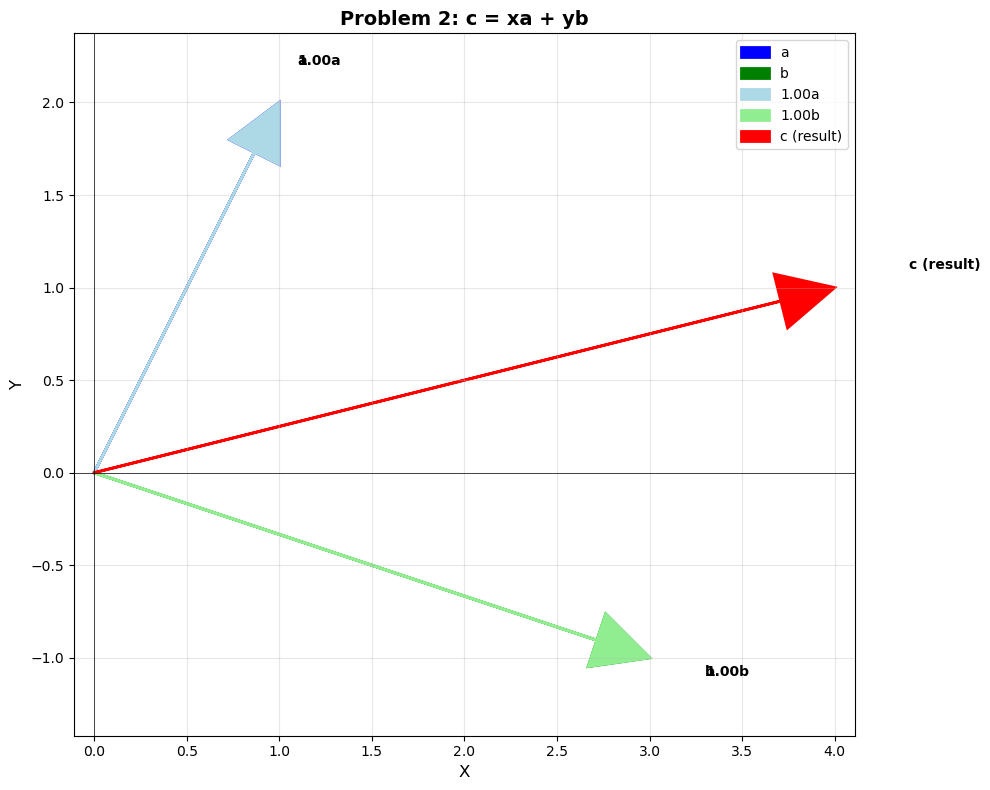

In [16]:
# Problem 2
a = np.array([1, 2])
b = np.array([3, -1])
c = np.array([4, 1])

print("Problem 2: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, x*a, y*b, c],
        ['a', 'b', f'{x:.2f}a', f'{y:.2f}b', 'c (result)'],
        ['blue', 'green', 'lightblue', 'lightgreen', 'red'],
        'Problem 2: c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

---
## 📝 Problem 3

**Given:** $\vec{a} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 4 \\ 6 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 6 \\ 9 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
2x + 4y = 6 \quad \text{(Equation 1)} \\
3x + 6y = 9 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** These vectors are parallel! $\vec{b} = 2\vec{a}$ and $\vec{c} = 3\vec{a}$

**Solving by elimination:**

Multiply Equation 1 by 3:

$$6x + 12y = 18 \quad \text{(Equation 3)}$$

Multiply Equation 2 by 2:

$$6x + 12y = 18 \quad \text{(Equation 4)}$$

Both equations are identical! This means there are infinitely many solutions.

One solution: $x = 3, y = 0$

**Verification:**

$$x\vec{a} + y\vec{b} = 3\begin{bmatrix} 2 \\ 3 \end{bmatrix} + 0\begin{bmatrix} 4 \\ 6 \end{bmatrix} = \begin{bmatrix} 6 \\ 9 \end{bmatrix} = \vec{c}$$

✓ Verified!

Problem 3: Is c a linear combination of a and b?
a = [2 3]
b = [4 6]
c = [6 9]

✅ YES! c IS a linear combination of a and b

Solution: x = 0.0000, y = 1.5000

Note: Vectors a and b are parallel (linearly dependent)
Multiple solutions exist!

Verification:
0.0000 * a = 0.0000 * [2 3] = [0. 0.]
1.5000 * b = 1.5000 * [4 6] = [6. 9.]

Result: 0.0000*a + 1.5000*b = [6. 9.]
Target: c = [6 9]

✓ Match: True


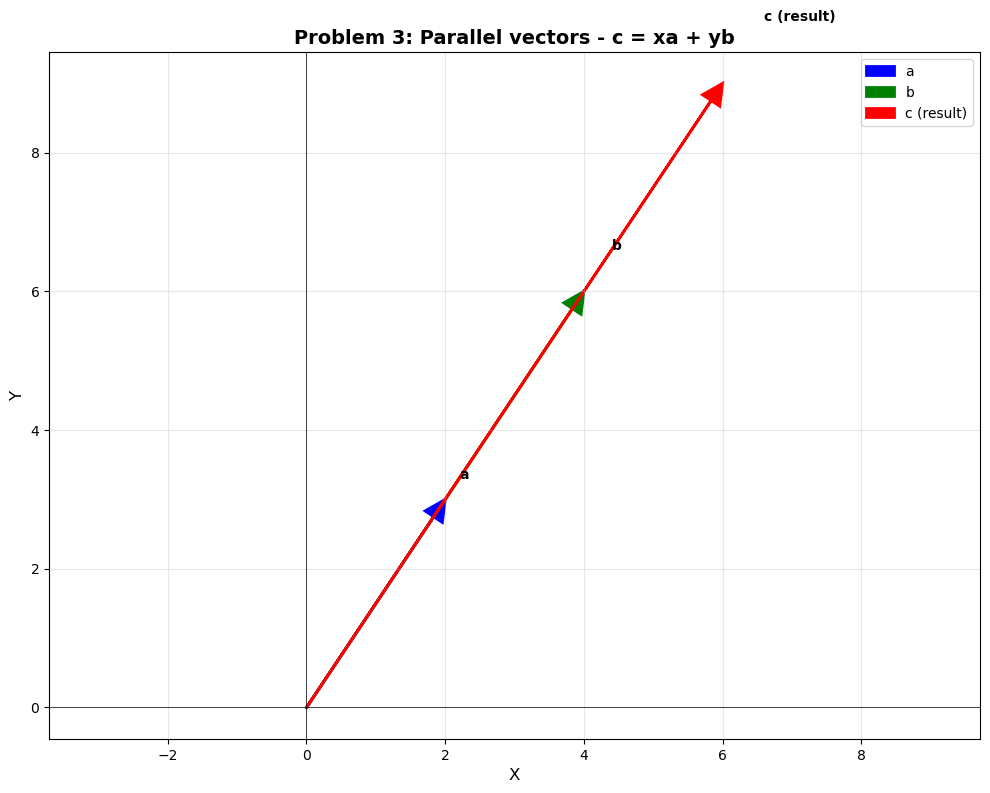

In [17]:
# Problem 3
a = np.array([2, 3])
b = np.array([4, 6])
c = np.array([6, 9])

print("Problem 3: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: Vectors a and b are parallel (linearly dependent)")
    print(f"Multiple solutions exist!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, c],
        ['a', 'b', 'c (result)'],
        ['blue', 'green', 'red'],
        'Problem 3: Parallel vectors - c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

---
## 📝 Problem 4

**Given:** $\vec{a} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 5 \\ 3 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
x + 0y = 5 \quad \text{(Equation 1)} \\
0x + y = 3 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** These are standard basis vectors! Solution is straightforward.

From Equation 1: $x = 5$

From Equation 2: $y = 3$

**Verification:**

$$x\vec{a} + y\vec{b} = 5\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 3\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 5 \\ 0 \end{bmatrix} + \begin{bmatrix} 0 \\ 3 \end{bmatrix} = \begin{bmatrix} 5 \\ 3 \end{bmatrix} = \vec{c}$$

✓ Verified!

Problem 4: Is c a linear combination of a and b?
a = [1 0]
b = [0 1]
c = [5 3]

✅ YES! c IS a linear combination of a and b

Solution: x = 5.0000, y = 3.0000

Note: a and b are standard basis vectors!

Verification:
5.0000 * a = 5.0000 * [1 0] = [5. 0.]
3.0000 * b = 3.0000 * [0 1] = [0. 3.]

Result: 5.0000*a + 3.0000*b = [5. 3.]
Target: c = [5 3]

✓ Match: True


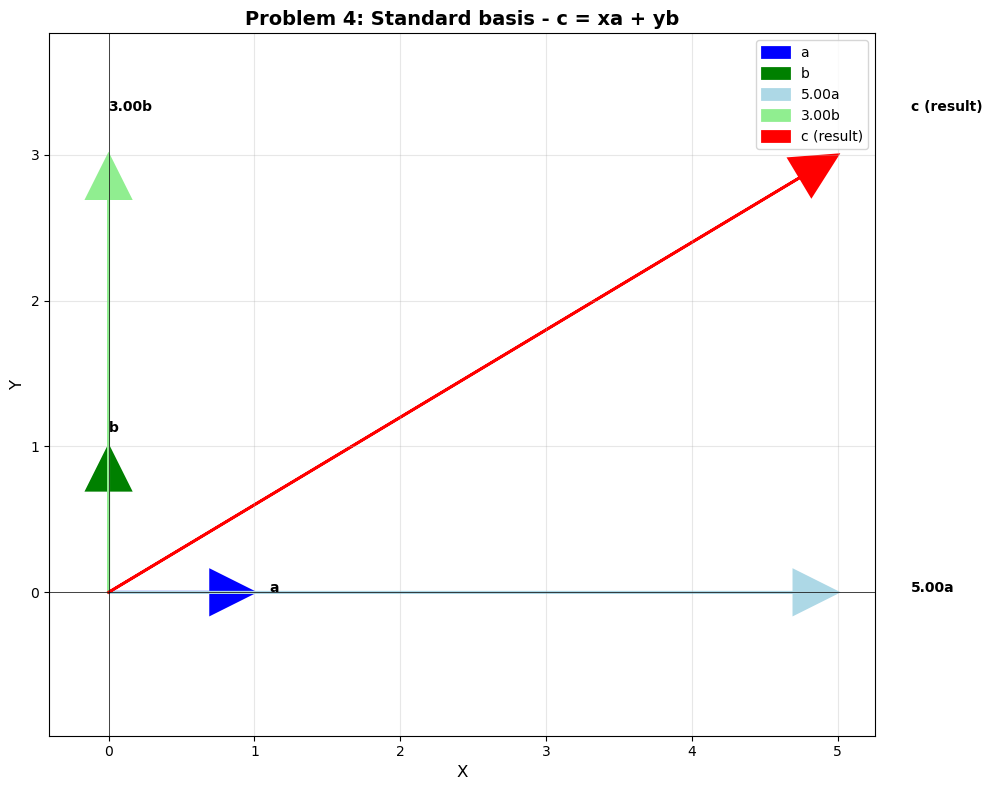

In [18]:
# Problem 4
a = np.array([1, 0])
b = np.array([0, 1])
c = np.array([5, 3])

print("Problem 4: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: a and b are standard basis vectors!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, x*a, y*b, c],
        ['a', 'b', f'{x:.2f}a', f'{y:.2f}b', 'c (result)'],
        ['blue', 'green', 'lightblue', 'lightgreen', 'red'],
        'Problem 4: Standard basis - c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

---
## 📝 Problem 5

**Given:** $\vec{a} = \begin{bmatrix} -1 \\ 2 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 2 \\ -4 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 3 \\ -6 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
-x + 2y = 3 \quad \text{(Equation 1)} \\
2x - 4y = -6 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** $\vec{b} = -2\vec{a}$ (parallel vectors!)

**Solving by elimination:**

Multiply Equation 1 by 2:

$$-2x + 4y = 6 \quad \text{(Equation 3)}$$

Add Equation 2 and Equation 3:

$$2x - 4y + (-2x + 4y) = -6 + 6$$

$$0 = 0$$

This confirms infinitely many solutions exist!

One solution: $x = -3, y = 0$

**Verification:**

$$x\vec{a} + y\vec{b} = -3\begin{bmatrix} -1 \\ 2 \end{bmatrix} + 0\begin{bmatrix} 2 \\ -4 \end{bmatrix} = \begin{bmatrix} 3 \\ -6 \end{bmatrix} = \vec{c}$$

✓ Verified!

In [19]:
# Problem 5
a = np.array([-1, 2])
b = np.array([2, -4])
c = np.array([3, -6])

print("Problem 5: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: Vectors a and b are parallel (b = -2a)")
    print(f"Infinitely many solutions exist!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, c],
        ['a', 'b', 'c (result)'],
        ['blue', 'green', 'red'],
        'Problem 5: Parallel vectors - c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

Problem 5: Is c a linear combination of a and b?
a = [-1  2]
b = [ 2 -4]
c = [ 3 -6]

❌ NO! c is NOT a linear combination of a and b


---
## 📝 Problem 6

**Given:** $\vec{a} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -2 \\ 5 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
3x - 2y = 0 \quad \text{(Equation 1)} \\
x + 5y = 0 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** $\vec{c} = \vec{0}$ (zero vector) - always a linear combination with $x=0, y=0$!

**Solving by elimination:**

Multiply Equation 2 by 3:

$$3x + 15y = 0 \quad \text{(Equation 3)}$$

Subtract Equation 1 from Equation 3:

$$3x + 15y - (3x - 2y) = 0 - 0$$

$$17y = 0$$

$$y = 0$$

Substitute $y = 0$ into Equation 2:

$$x + 5(0) = 0$$

$$x = 0$$

**Verification:**

$$x\vec{a} + y\vec{b} = 0\begin{bmatrix} 3 \\ 1 \end{bmatrix} + 0\begin{bmatrix} -2 \\ 5 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} = \vec{c}$$

✓ Verified!

Problem 6: Is c a linear combination of a and b?
a = [3 1]
b = [-2  5]
c = [0 0]

✅ YES! c IS a linear combination of a and b

Solution: x = 0.0000, y = 0.0000

Note: c is the zero vector - always a linear combination!

Verification:
0.0000 * a = 0.0000 * [3 1] = [0. 0.]
0.0000 * b = 0.0000 * [-2  5] = [-0.  0.]

Result: 0.0000*a + 0.0000*b = [0. 0.]
Target: c = [0 0]

✓ Match: True


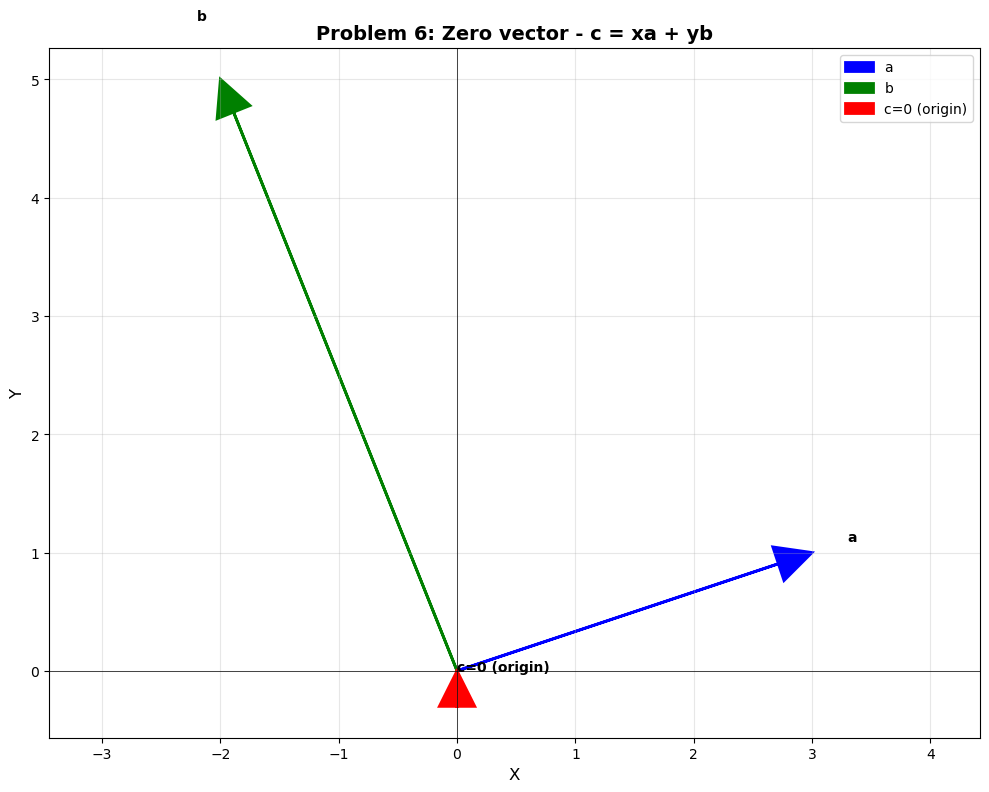

In [20]:
# Problem 6
a = np.array([3, 1])
b = np.array([-2, 5])
c = np.array([0, 0])

print("Problem 6: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: c is the zero vector - always a linear combination!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, c],
        ['a', 'b', 'c=0 (origin)'],
        ['blue', 'green', 'red'],
        'Problem 6: Zero vector - c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

---
## 📝 Problem 7

**Given:** $\vec{a} = \begin{bmatrix} 4 \\ -2 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} -6 \\ 3 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 2 \\ -1 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
4x - 6y = 2 \quad \text{(Equation 1)} \\
-2x + 3y = -1 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** $\vec{b} = -\frac{3}{2}\vec{a}$ and $\vec{c} = \frac{1}{2}\vec{a}$ (all parallel!)

**Solving by elimination:**

Multiply Equation 2 by 2:

$$-4x + 6y = -2 \quad \text{(Equation 3)}$$

Add Equation 1 and Equation 3:

$$4x - 6y + (-4x + 6y) = 2 + (-2)$$

$$0 = 0$$

Infinitely many solutions exist!

One solution: $x = 0.5, y = 0$

**Verification:**

$$x\vec{a} + y\vec{b} = 0.5\begin{bmatrix} 4 \\ -2 \end{bmatrix} + 0\begin{bmatrix} -6 \\ 3 \end{bmatrix} = \begin{bmatrix} 2 \\ -1 \end{bmatrix} = \vec{c}$$

✓ Verified!

In [21]:
# Problem 7
a = np.array([4, -2])
b = np.array([-6, 3])
c = np.array([2, -1])

print("Problem 7: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: All three vectors are parallel!")
    print(f"c = 0.5*a, b = -1.5*a")
    print(f"Infinitely many solutions exist!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, c],
        ['a', 'b', 'c (result)'],
        ['blue', 'green', 'red'],
        'Problem 7: All parallel vectors - c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")

Problem 7: Is c a linear combination of a and b?
a = [ 4 -2]
b = [-6  3]
c = [ 2 -1]

❌ NO! c is NOT a linear combination of a and b


---
## 📝 Problem 8

**Given:** $\vec{a} = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 10 \\ 4 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 3 \\ 1 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system:

$$\begin{cases}
5x + 10y = 3 \quad \text{(Equation 1)} \\
2x + 4y = 1 \quad \text{(Equation 2)}
\end{cases}$$

**Note:** $\vec{b} = 2\vec{a}$ (parallel), but $\vec{c}$ is NOT parallel to them!

**Solving by elimination:**

Multiply Equation 2 by 2.5:

$$5x + 10y = 2.5 \quad \text{(Equation 3)}$$

Subtract Equation 3 from Equation 1:

$$5x + 10y - (5x + 10y) = 3 - 2.5$$

$$0 = 0.5$$

**Contradiction!** This is impossible, so NO solution exists.

**Conclusion:** $\vec{c}$ is NOT a linear combination of $\vec{a}$ and $\vec{b}$ because $\vec{c}$ is not parallel to the line formed by $\vec{a}$ and $\vec{b}$.

Problem 8: Is c a linear combination of a and b?
a = [5 2]
b = [10  4]
c = [3 1]

❌ NO! c is NOT a linear combination of a and b

Reason: Vectors a and b are parallel (b = 2a),
but c is NOT parallel to them.

This means c cannot be reached by any combination of a and b!


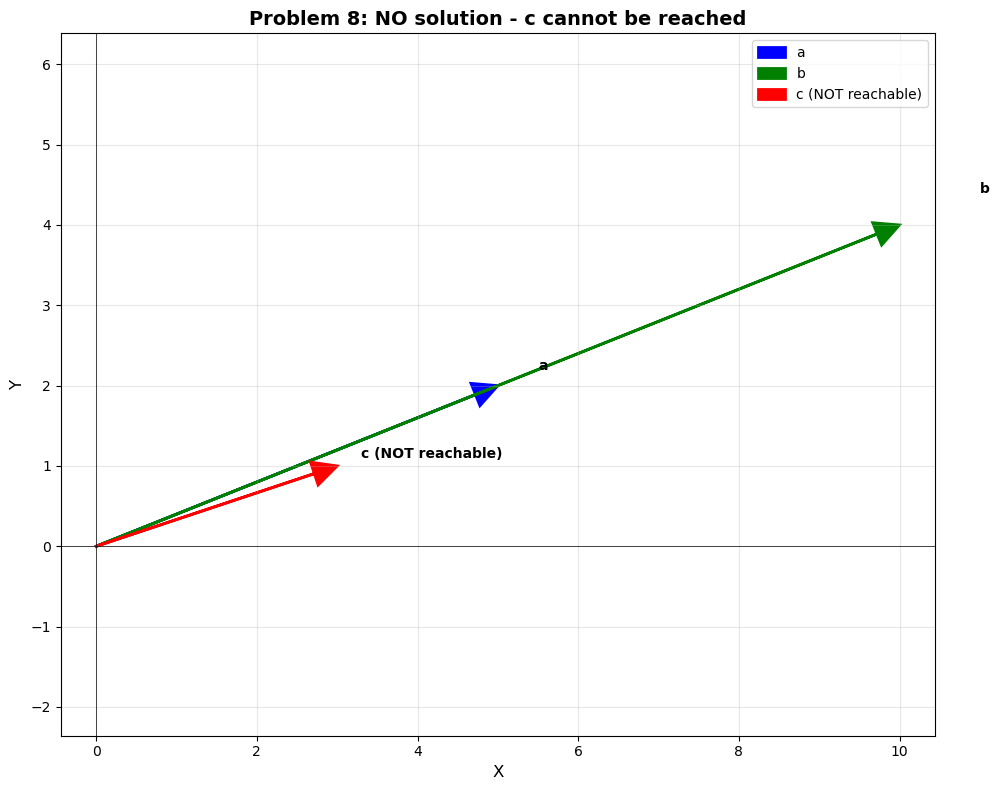

In [22]:
# Problem 8
a = np.array([5, 2])
b = np.array([10, 4])
c = np.array([3, 1])

print("Problem 8: Is c a linear combination of a and b?")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_2d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
    
    plot_vectors_2d(
        [a, b, x*a, y*b, c],
        ['a', 'b', f'{x:.2f}a', f'{y:.2f}b', 'c (result)'],
        ['blue', 'green', 'lightblue', 'lightgreen', 'red'],
        'Problem 8: c = xa + yb'
    )
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")
    print(f"\nReason: Vectors a and b are parallel (b = 2a),")
    print(f"but c is NOT parallel to them.")
    print(f"\nThis means c cannot be reached by any combination of a and b!")
    
    plot_vectors_2d(
        [a, b, c],
        ['a', 'b', 'c (NOT reachable)'],
        ['blue', 'green', 'red'],
        'Problem 8: NO solution - c cannot be reached'
    )

---
## 📝 Problem 9

**Given:** $\vec{a} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system (3 equations, 2 unknowns - overdetermined):

$$\begin{cases}
x + 4y = 7 \quad \text{(Equation 1)} \\
2x + 5y = 8 \quad \text{(Equation 2)} \\
3x + 6y = 9 \quad \text{(Equation 3)}
\end{cases}$$

**Solving using first two equations:**

Multiply Equation 1 by 2:

$$2x + 8y = 14 \quad \text{(Equation 4)}$$

Subtract Equation 2 from Equation 4:

$$2x + 8y - (2x + 5y) = 14 - 8$$

$$3y = 6$$

$$y = 2$$

Substitute $y = 2$ into Equation 1:

$$x + 4(2) = 7$$

$$x = -1$$

**Check with Equation 3:**

$$3(-1) + 6(2) = -3 + 12 = 9$$

✓ Correct!

**Verification:**

$$x\vec{a} + y\vec{b} = -1\begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + 2\begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}$$

$$= \begin{bmatrix} -1 \\ -2 \\ -3 \end{bmatrix} + \begin{bmatrix} 8 \\ 10 \\ 12 \end{bmatrix} = \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} = \vec{c}$$

✓ Verified!

In [23]:
# Problem 9 (3D - no visualization)
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])

print("Problem 9: Is c a linear combination of a and b? (3D vectors)")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_3d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nNote: This is a 3D problem (3 equations, 2 unknowns)")
    print(f"Solution exists because all 3 equations are consistent!")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")
    print(f"\nThe system is overdetermined and inconsistent.")

Problem 9: Is c a linear combination of a and b? (3D vectors)
a = [1 2 3]
b = [4 5 6]
c = [7 8 9]

✅ YES! c IS a linear combination of a and b

Solution: x = -1.0000, y = 2.0000

Note: This is a 3D problem (3 equations, 2 unknowns)
Solution exists because all 3 equations are consistent!

Verification:
-1.0000 * a = -1.0000 * [1 2 3] = [-1. -2. -3.]
2.0000 * b = 2.0000 * [4 5 6] = [ 8. 10. 12.]

Result: -1.0000*a + 2.0000*b = [7. 8. 9.]
Target: c = [7 8 9]

✓ Match: True


---
## 📝 Problem 10

**Given:** $\vec{a} = \begin{bmatrix} 2 \\ 1 \\ 0 \end{bmatrix}$, $\vec{b} = \begin{bmatrix} 1 \\ 3 \\ 2 \end{bmatrix}$, $\vec{c} = \begin{bmatrix} 5 \\ 4 \\ 1 \end{bmatrix}$

**Question:** Is $\vec{c}$ a linear combination of $\vec{a}$ and $\vec{b}$?

**Solution:** We need to find scalars $x$ and $y$ such that:

$$\vec{c} = x\vec{a} + y\vec{b}$$

This gives us the system (3 equations, 2 unknowns - overdetermined):

$$\begin{cases}
2x + y = 5 \quad \text{(Equation 1)} \\
x + 3y = 4 \quad \text{(Equation 2)} \\
0x + 2y = 1 \quad \text{(Equation 3)}
\end{cases}$$

**From Equation 3:**

$$2y = 1$$

$$y = 0.5$$

**Substitute into Equation 2:**

$$x + 3(0.5) = 4$$

$$x + 1.5 = 4$$

$$x = 2.5$$

**Check with Equation 1:**

$$2(2.5) + 0.5 = 5 + 0.5 = 5.5 \neq 5$$

**Contradiction!** The system is inconsistent.

**Conclusion:** $\vec{c}$ is NOT a linear combination of $\vec{a}$ and $\vec{b}$.

In [24]:
# Problem 10 (3D - no visualization)
a = np.array([2, 1, 0])
b = np.array([1, 3, 2])
c = np.array([5, 4, 1])

print("Problem 10: Is c a linear combination of a and b? (3D vectors)")
print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")
print()

solution = solve_linear_combination_3d(a, b, c)

if solution is not None:
    x, y = solution
    print(f"✅ YES! c IS a linear combination of a and b")
    print(f"\nSolution: x = {x:.4f}, y = {y:.4f}")
    print(f"\nVerification:")
    print(f"{x:.4f} * a = {x:.4f} * {a} = {x*a}")
    print(f"{y:.4f} * b = {y:.4f} * {b} = {y*b}")
    result = x*a + y*b
    print(f"\nResult: {x:.4f}*a + {y:.4f}*b = {result}")
    print(f"Target: c = {c}")
    print(f"\n✓ Match: {np.allclose(result, c)}")
else:
    print(f"❌ NO! c is NOT a linear combination of a and b")
    print(f"\nReason: The system is overdetermined (3 equations, 2 unknowns)")
    print(f"and INCONSISTENT - the equations contradict each other.")
    print(f"\nThis means c cannot lie in the plane spanned by a and b!")

Problem 10: Is c a linear combination of a and b? (3D vectors)
a = [2 1 0]
b = [1 3 2]
c = [5 4 1]

❌ NO! c is NOT a linear combination of a and b

Reason: The system is overdetermined (3 equations, 2 unknowns)
and INCONSISTENT - the equations contradict each other.

This means c cannot lie in the plane spanned by a and b!


---
## 🎯 Summary

**Key Concepts:**

1. **Linear Combination:** A vector $\vec{c}$ is a linear combination of $\vec{a}$ and $\vec{b}$ if there exist scalars $x$ and $y$ such that $\vec{c} = x\vec{a} + y\vec{b}$

2. **2D Cases:**
   - **Unique solution:** When $\vec{a}$ and $\vec{b}$ are not parallel (Problems 1, 2, 4)
   - **Infinitely many solutions:** When $\vec{a}$ and $\vec{b}$ are parallel AND $\vec{c}$ is also parallel (Problems 3, 5, 7)
   - **No solution:** When $\vec{a}$ and $\vec{b}$ are parallel but $\vec{c}$ is NOT parallel (Problem 8)

3. **3D Cases (Overdetermined):**
   - **Solution exists:** When all 3 equations are consistent (Problem 9)
   - **No solution:** When the equations are inconsistent (Problem 10)

4. **Special Cases:**
   - **Zero vector:** Always a linear combination with $x=0, y=0$ (Problem 6)
   - **Standard basis vectors:** Simplest case (Problem 4)

**Problems Summary:**
- ✅ Solutions exist: Problems 1, 2, 3, 4, 5, 6, 7, 9
- ❌ No solutions: Problems 8, 10